<h1 align="center">Volume 2: The Fourier Transform.</h1>

    <Name>
    <Class>
    <Date>

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [76]:
from matplotlib import pyplot as plt
from scipy.io import wavfile
import numpy as np
import IPython
from scipy import fftpack
import time

In [13]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [102]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples

    # Problems 1.1 and 1.7
    def plot(self, dft=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        if dft:
            transform = fftpack.fft(self.samples)
            
            x = np.arange(0, self.samples.size, 1)
            domain = x * self.rate / self.samples.size
            plt.plot(domain, np.abs(transform))
            plt.xlim(0, np.max(domain) // 2)
            plt.show()
        else:
            numSeconds = self.samples.shape[0] / self.rate
            x = np.linspace(0, numSeconds, self.samples.shape[0])
            plt.plot(x, self.samples)
            plt.ylim(-32768, 32768)
            plt.show()

    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        if force:
            scaled = np.int16((self.samples / np.max(self.samples)) * 32767)
            
            wavfile.write(filename, self.rate, scaled)
            
        else:
            wavfile.write(filename, self.rate, self.samples)
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        if self.samples.shape != other.samples.shape:
            raise ValueError("sample arrays not of same length")
            
        rate = self.rate
        newsamples = self.samples + other.samples
        return SoundWave(rate, newsamples)

    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate:
            raise ValueError("samples rates are not equivalent")
            
        new_samples = np.concatenate((self.samples, other.samples))
        return SoundWave(other.rate, new_samples)
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

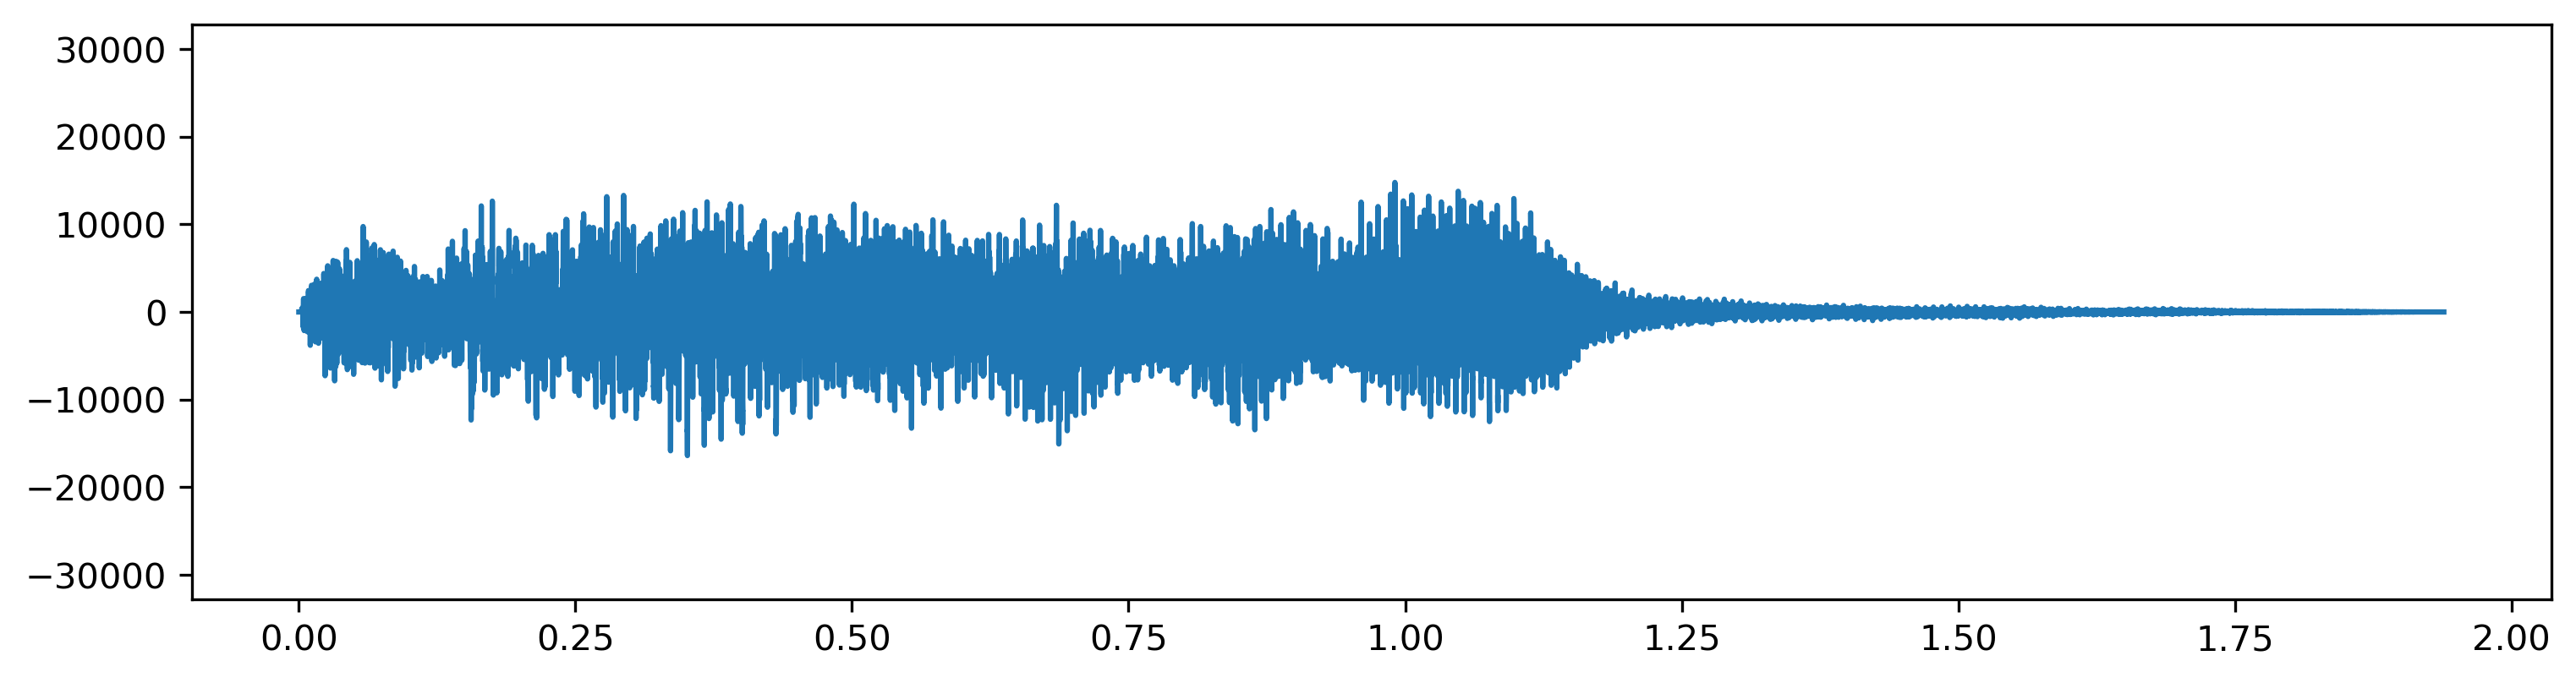

In [18]:
rate, samples = wavfile.read("tada.wav")
sounds = SoundWave(rate, samples)
sounds.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [25]:
rate, samples = wavfile.read("tada.wav")
sounds = SoundWave(rate, samples)
sounds.export("noise.wav", force=True)
IPython.display.Audio(filename="noise.wav")

is scaled


In [26]:
rate, samples = wavfile.read("tada.wav")
sounds = SoundWave(rate, samples)
sounds.export("noise.wav")
IPython.display.Audio(filename="noise.wav")

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [53]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    rate = 44100
    x = np.linspace(0, duration, duration * rate)
    sample = np.int16(1000 * np.sin(2 * np.pi * x * frequency))
    
    
    return SoundWave(rate, sample)

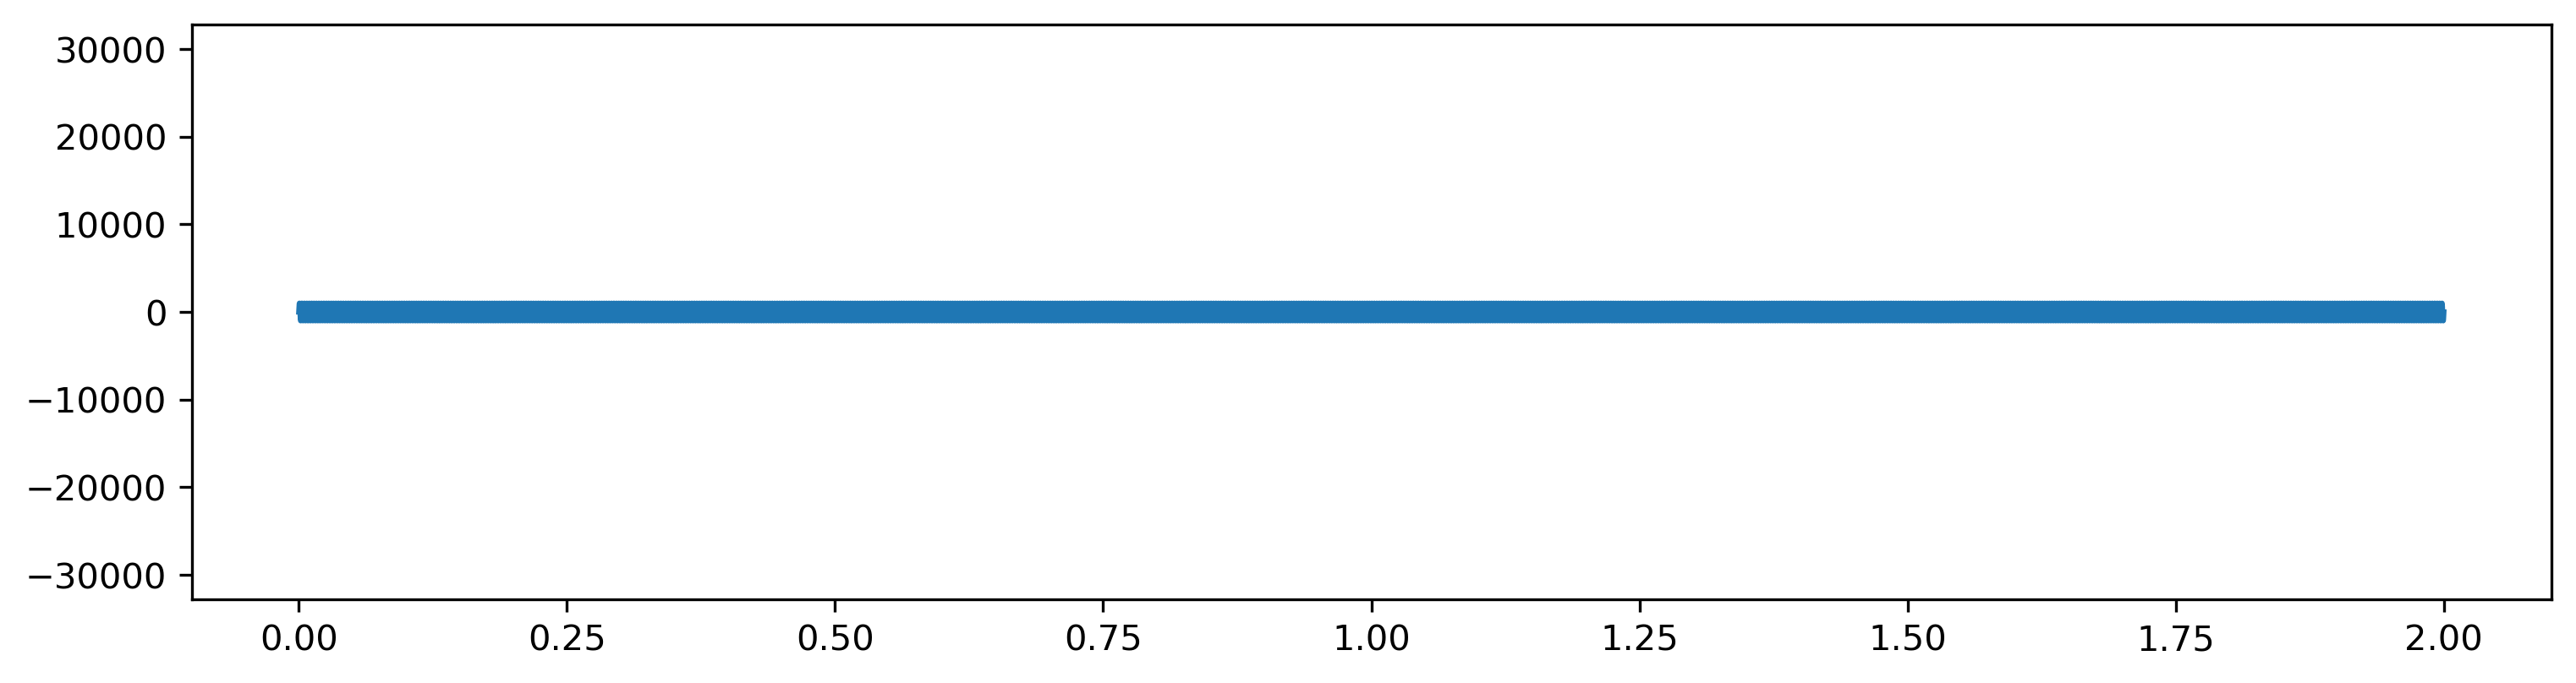

In [54]:
sounds = generate_note(440, 2)

wavfile.write("Achord.wav", sounds.rate, sounds.samples)
IPython.display.Audio("Achord.wav")

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [64]:
sounds = generate_note(440, 2) + generate_note(523.25, 2) + generate_note(659.25, 2)
wavfile.write("minorchord.wav", sounds.rate, sounds.samples)
IPython.display.Audio("minorchord.wav")

In [63]:
sounds = generate_note(440, 2) >> generate_note(523.25, 2) >> generate_note(659.25, 2)
wavfile.write("arpeggio.wav", sounds.rate, sounds.samples)
IPython.display.Audio("arpeggio.wav")

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [72]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    n = samples.shape[0]
    m = np.arange(n).reshape(n, 1)
    F = np.exp((-2j * np.pi / n) * m @ m.T) / n
    return F @ samples
    

In [74]:
n = 10
samples = np.random.randint(-32768, 32767, n, dtype=np.int16)
np.allclose(fftpack.fft(samples), n * simple_dft(samples))

[ 5837.8       +0.00000000e+00j  2374.95163838+4.05047920e+02j
 -7047.06324119+6.34598939e+02j -4943.25163838+4.72978601e+03j
   508.16324119-4.90598300e+03j -6762.4       -1.98957344e-12j
   508.16324119+4.90598300e+03j -4943.25163838-4.72978601e+03j
 -7047.06324119-6.34598939e+02j  2374.95163838-4.05047920e+02j]
[ 58378.            -0.j          23749.51638381 +4050.47919892j
 -70470.63241188 +6345.98939142j -49432.51638381+47297.86010761j
   5081.63241188-49059.83001544j -67624.            -0.j
   5081.63241188+49059.83001544j -49432.51638381-47297.86010761j
 -70470.63241188 -6345.98939142j  23749.51638381 -4050.47919892j]


True

### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [90]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    def split(g):
        n = g.size
        if n <= threshold:
            return n * simple_dft(g)
        else:
            even = split(g[::2])
            odd = split(g[1::2])
            z = np.zeros(n, dtype=np.complex64)
            for k in range(n):
                z[k] = np.exp((-2j * np.pi * k) / n)
            
            m = n // 2
            return np.concatenate((even + np.multiply(z[:m], odd), even + np.multiply(z[m:], odd)))
    return split(samples) / samples.size

In [93]:
n = 8192
samples = np.random.randint(-100, 100, n, dtype=np.int16)
start = time.time()
simple_dft(samples)
end = time.time()
print("simple_dft took", end - start, "seconds")

start=time.time()
simple = simple_fft(samples)
end = time.time()
print("simple_fft took", end - start, "seconds")

start = time.time()
sci_fft = fftpack.fft(samples)
end = time.time()
print("fftpack.fft took", end - start, "seconds")

np.allclose(sci_fft, n * simple)


simple_dft took 8.243080377578735 seconds
simple_fft took 0.5959701538085938 seconds
fftpack.fft took 0.0005018711090087891 seconds


True

### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

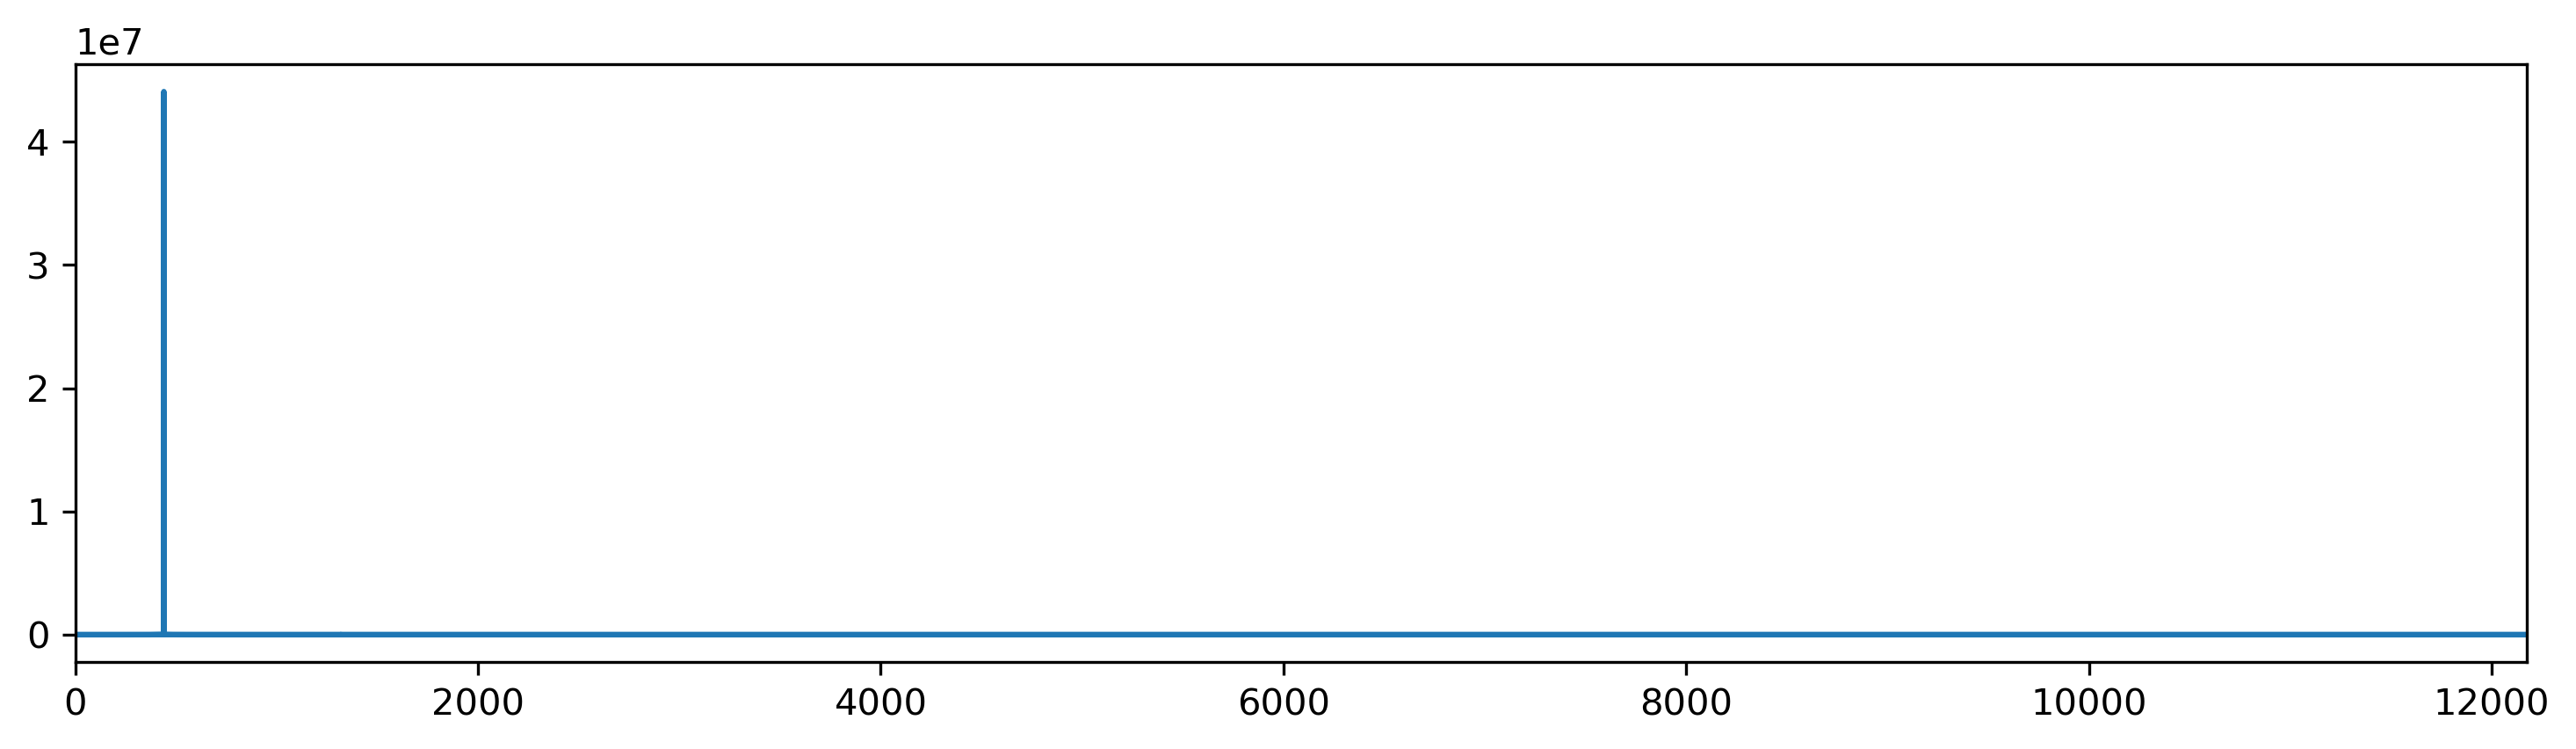

In [103]:
Atone = generate_note(440, 2)
Atone.plot(dft=True)

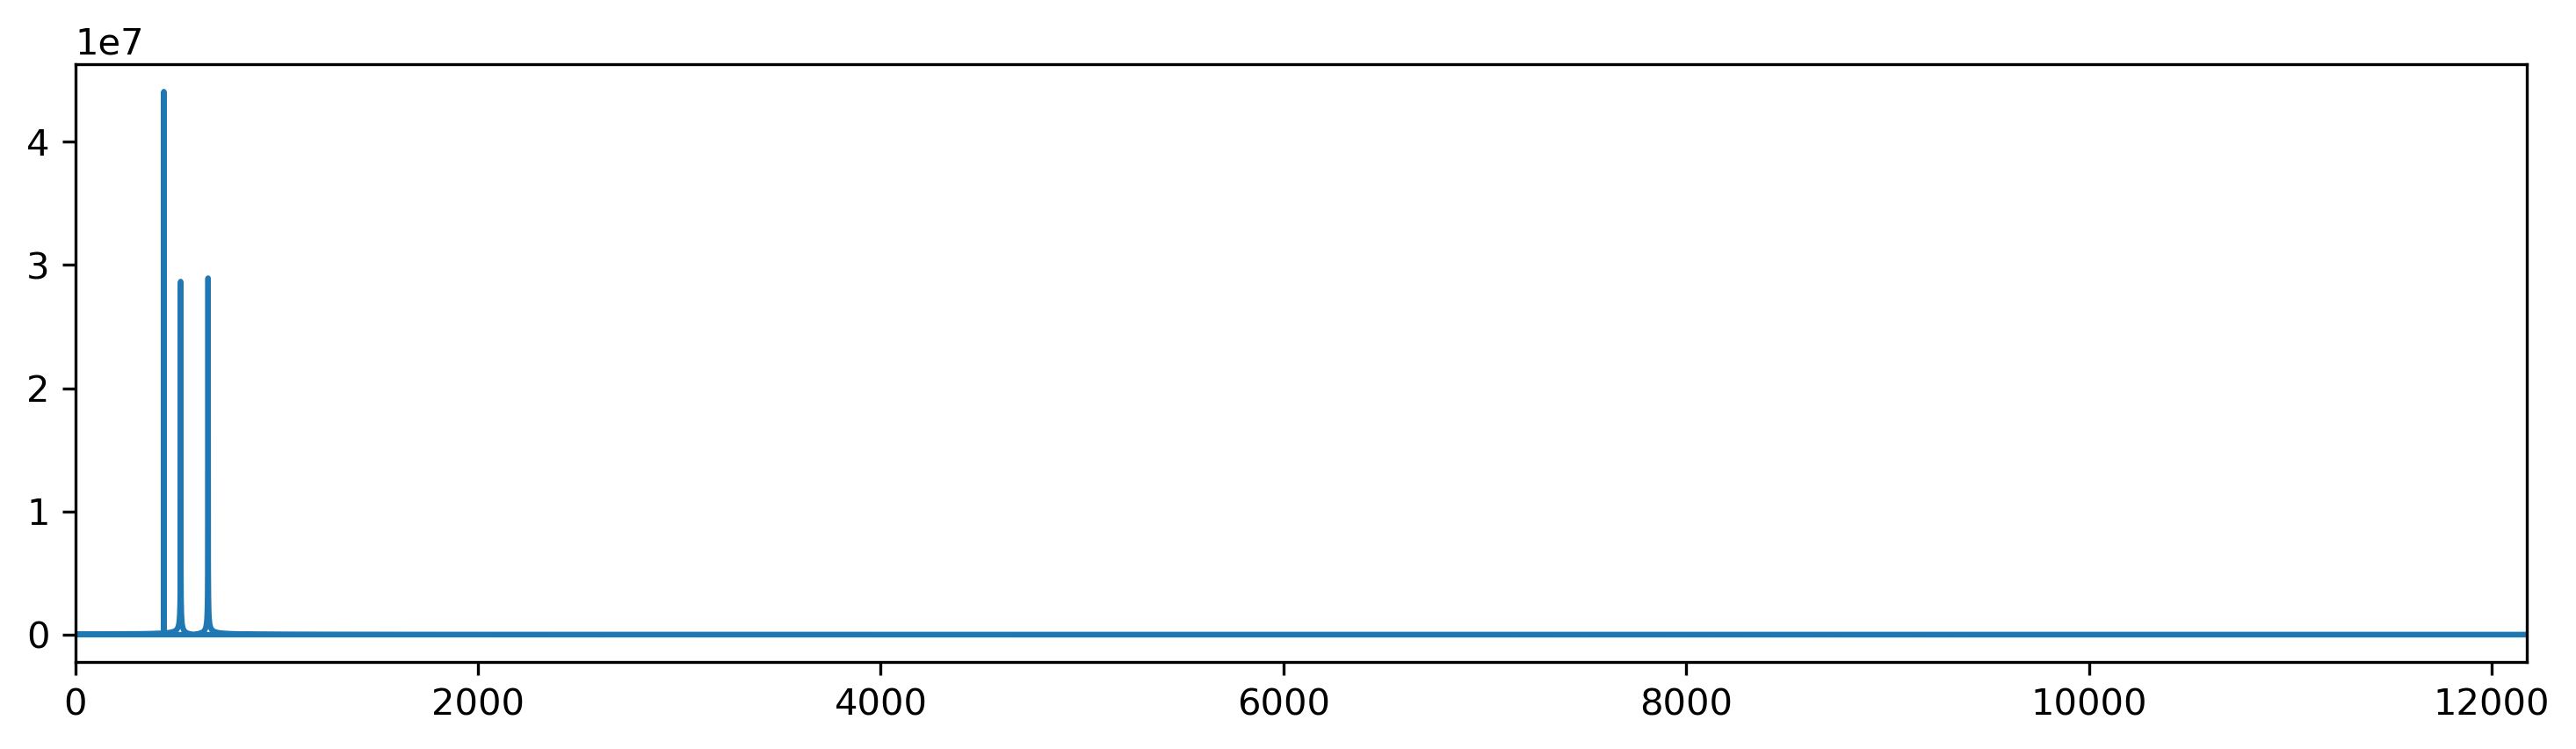

In [104]:
minorchord = generate_note(440, 2) + generate_note(523.25, 2) + generate_note(659.25, 2)
minorchord.plot(dft=True)

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

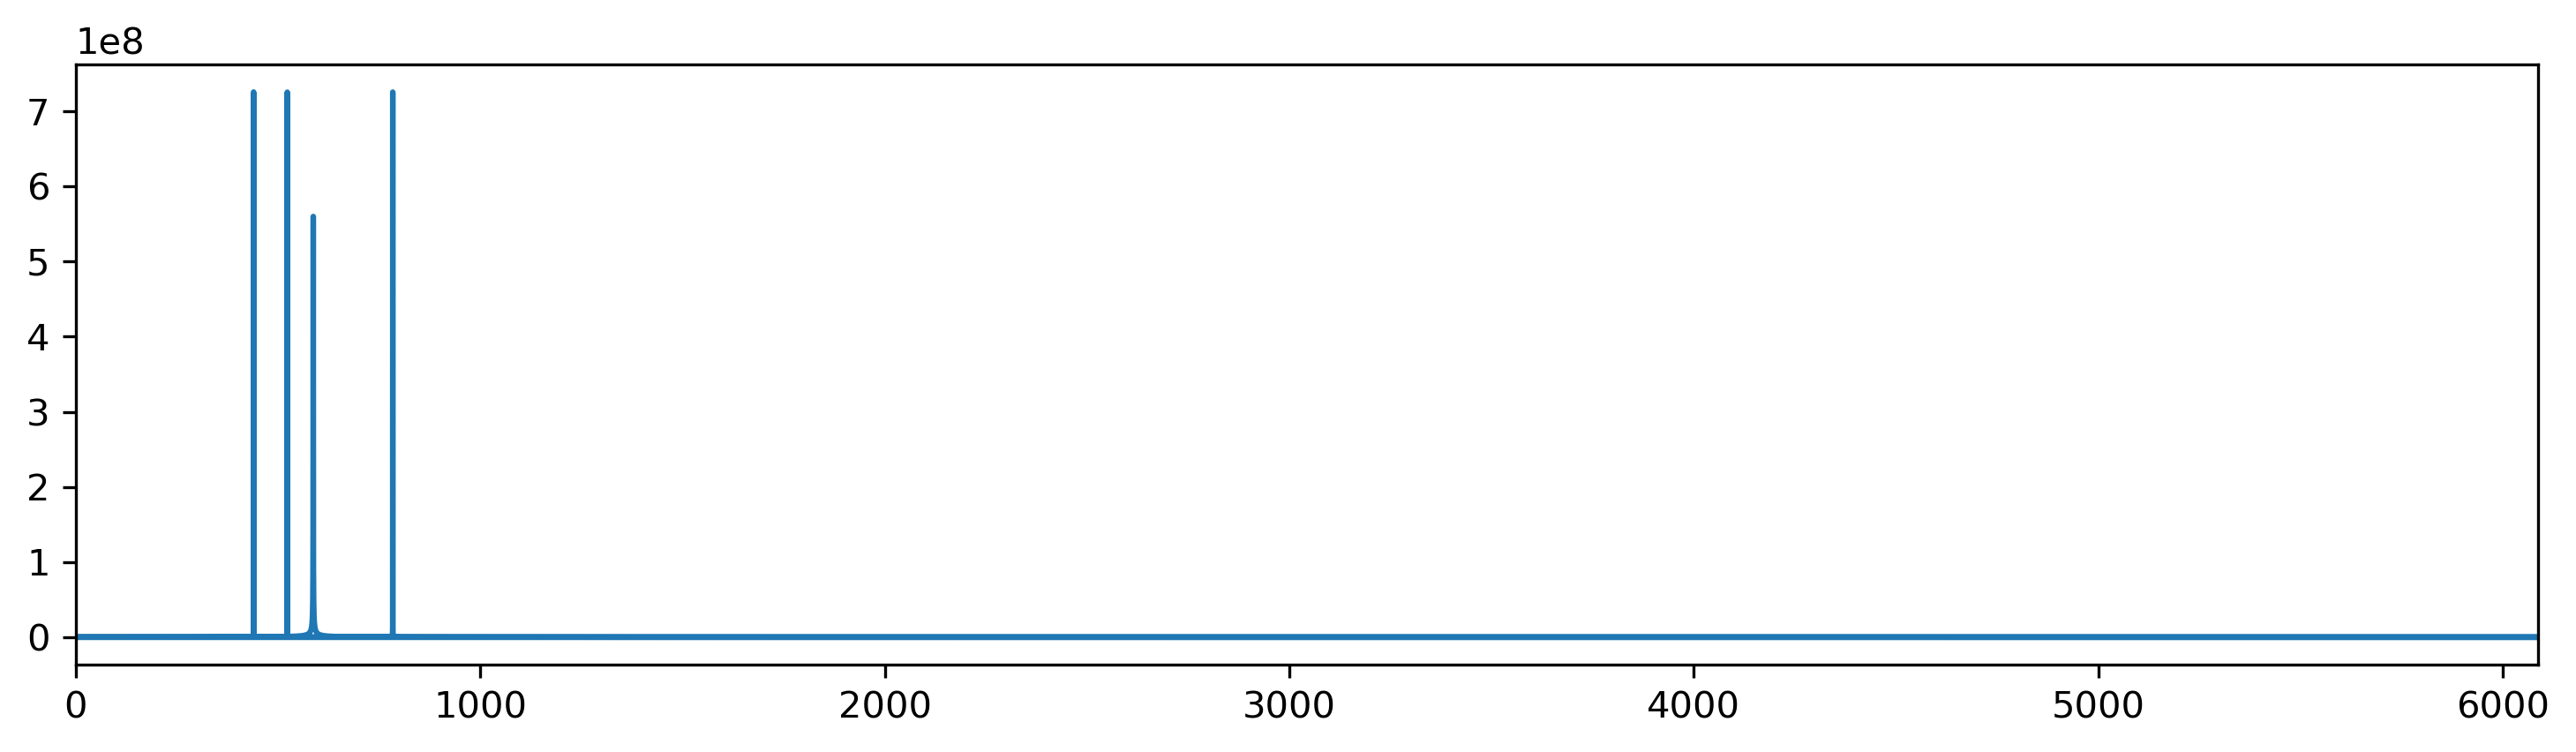

[43660.     440.     784.   43316.     523.25 43576.75 43512.5    587.5 ]


In [134]:
rate, samples = wavfile.read("mystery_chord.wav")
sound = SoundWave(rate, samples)
sound.plot(dft=True)
transform = fftpack.fft(samples)
transform = np.abs(transform)
indices = np.argsort(transform)[::-1]
print(indices[:8] * rate / samples.size)


The notes are... G, A, C, D

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

The year on the sticker is...